<h1 align="center"><font size="6"> Fuel Efficiency Prediction</font></h1>

In this assignment, we will analyze and predict the **Auto MPG dataset** from the website 'https://archive.ics.uci.edu/dataset/9/auto+mpg'. First, we will explore this dataset. Then, we will properly prepare the data using handling missing values, converting variable types and normalization. We will check which variables are important in determining the tager variable. Later we splitting the data and we will build various types of models, which will be evaluated using appropriate matrics: $R^2$ and $MSE$. Finally, we will select the best models to solve our prediction problem. 

## About the dataset

The Auto MPG dataset contains information about cars models, including their weights, number of cylinders, horsepower, year of manufacture, country of production and fuel efficiency measured in miles per gallon. The dataset contains 398 samples.

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset
data = sns.load_dataset("mpg")
print(data.columns)
print('The samples of set is: ', data.shape[0])
data.head()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')
The samples of set is:  398


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Goal of the analysis

We aim to predict the fuel efficiency of cars measured in miles per gallon. We will use following dataset to achieve our goal. We begin by cleaning and preparing the data for analysis. 

## Data wrangling

### Types of data

In [3]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

Many of columns are numerical. We should decide how to do the columns with object (categorical) data types. We can check whether the 'name' column contains unique values.

In [4]:
data['name'].value_counts().shape

(305,)

In this column is 305 unique values, where all is 398. We decided to remove it from the dataset. 

In [5]:
data = data.drop('name',axis = 1)

Now, we should see how values are contains in the 'name'.

In [6]:
print(data['origin'].value_counts())

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64


We decided to convert type of the 'name' using indicator (dummy) variables. This step will be performed after handling the missing values.

In [7]:
# identify and handle missing values
missing_count = np.where(data.isna().sum() == 0, '', data.isna().sum())
missing_info = pd.DataFrame({'Name': data.columns, 'Missing_count': missing_count})
missing_info

,Name,Missing_count
0,mpg,
1,cylinders,
2,displacement,
3,horsepower,6
4,weight,
5,acceleration,
6,model_year,
7,origin,


For the 'horsepower' has 6 missing values. We will not drop these samples. We can replace them by most frequent value if one clearly dominates the data. Also we can replace by mean of the 'horsepower'.

In [8]:
freq_val_horsepower = data['horsepower'].value_counts()
freq_val_horsepower

horsepower
150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
77.0      1
132.0     1
64.0      1
116.0     1
82.0      1
Name: count, Length: 93, dtype: int64

We have many diffetent values for this variable. So we estimate using the mean.

In [9]:
mean_horsepower = data['horsepower'].mean()
data['horsepower'] = data['horsepower'].fillna(mean_horsepower)

In [10]:
# Checking
missing_count = np.where(data.isna().sum() == 0, '', data.isna().sum())
missing_info = pd.DataFrame({'Name': data.columns, 'Missing_count': missing_count})
missing_info

,Name,Missing_count
0,mpg,
1,cylinders,
2,displacement,
3,horsepower,
4,weight,
5,acceleration,
6,model_year,
7,origin,


### Indicator variables

For categorical column, we build indicator variables, which will be a numerical. This allows the model to interpret each category separately.

In [11]:
dummy_origin = pd.get_dummies(data['origin']).astype(int)
dummy_origin.columns = ['origin_usa', 'origin_japan', 'origin_europe']
data = data.drop('origin', axis = 1)
data = pd.concat([data, dummy_origin], axis = 1)

### Correlation

Now, we analyse the association between 'mpg' and other variables. 

In [12]:
data.corr()['mpg']

mpg              1.000000
cylinders       -0.775396
displacement    -0.804203
horsepower      -0.771437
weight          -0.831741
acceleration     0.420289
model_year       0.579267
origin_usa       0.259022
origin_japan     0.442174
origin_europe   -0.568192
Name: mpg, dtype: float64

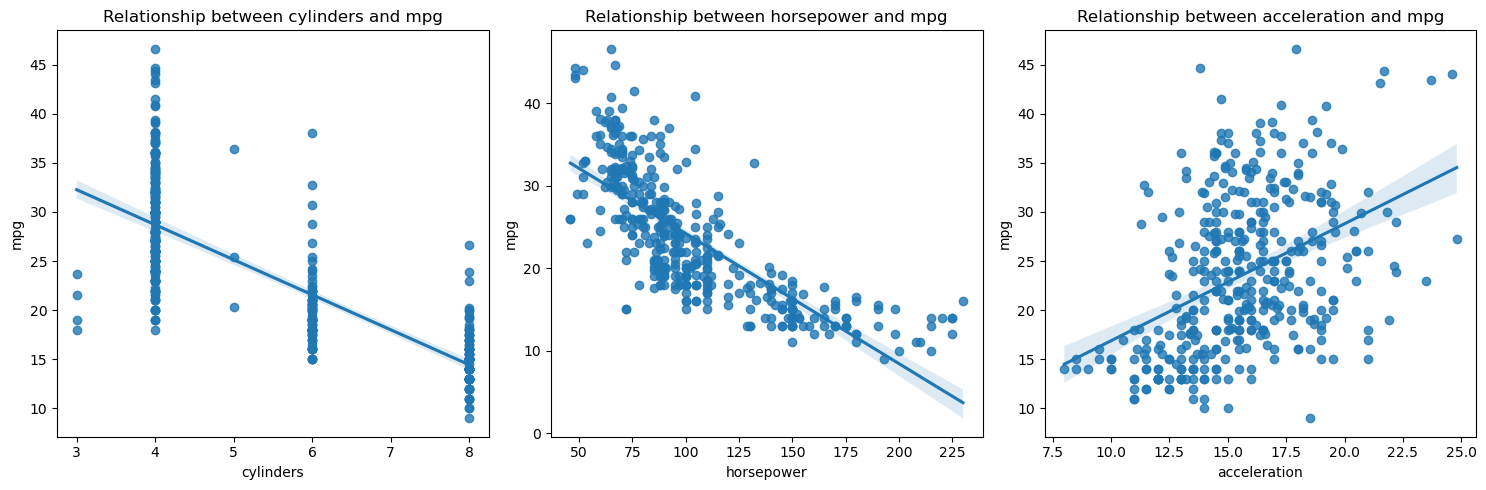

In [13]:
plt.figure(figsize =(15,5))

plt.subplot(1,3,1)
sns.regplot(x = 'cylinders', y = 'mpg', data = data)
plt.title('Relationship between cylinders and mpg')

plt.subplot(1, 3, 2)
sns.regplot(x = 'horsepower', y = 'mpg', data = data)
plt.title('Relationship between horsepower and mpg')

plt.subplot(1, 3, 3)
sns.regplot(x = 'acceleration', y = 'mpg', data = data)
plt.title('Relationship between acceleration and mpg')

plt.tight_layout() 
plt.show()

Based on the correlation results and regression plots, we can observe that each variable may important significance to model performance. The variables show strong positive or negative correlations with the target. To confirm these relationships, we can also use Pearson's correlation test, where the null hypothesis assume no linear relationship between the two variales.

In [14]:
from scipy.stats import pearsonr
def Pearson_test(data, column_indep, target):
    stat, p = pearsonr(data[column_indep], data[target])
    if p >= 0.05:
        print('No linear relationship between ', column_indep, ' and ',  target, '. P-value is ', p)
    else:
        print('Linear relationship between ', column_indep, ' and ',  target, '. P-value is ', p)

Pearson_test(data, 'cylinders', 'mpg')
Pearson_test(data, 'displacement', 'mpg')
Pearson_test(data, 'displacement', 'mpg')
Pearson_test(data, 'weight', 'mpg')
Pearson_test(data, 'acceleration', 'mpg')
Pearson_test(data, 'model_year', 'mpg')

Linear relationship between  cylinders  and  mpg . P-value is  4.503992246176589e-81
Linear relationship between  displacement  and  mpg . P-value is  1.6558889101929443e-91
Linear relationship between  displacement  and  mpg . P-value is  1.6558889101929443e-91
Linear relationship between  weight  and  mpg . P-value is  2.9727995640496354e-103
Linear relationship between  acceleration  and  mpg . P-value is  1.8230915350788598e-18
Linear relationship between  model_year  and  mpg . P-value is  4.844935813365779e-37


### Outliers

We should check if numerical variables have outliers.

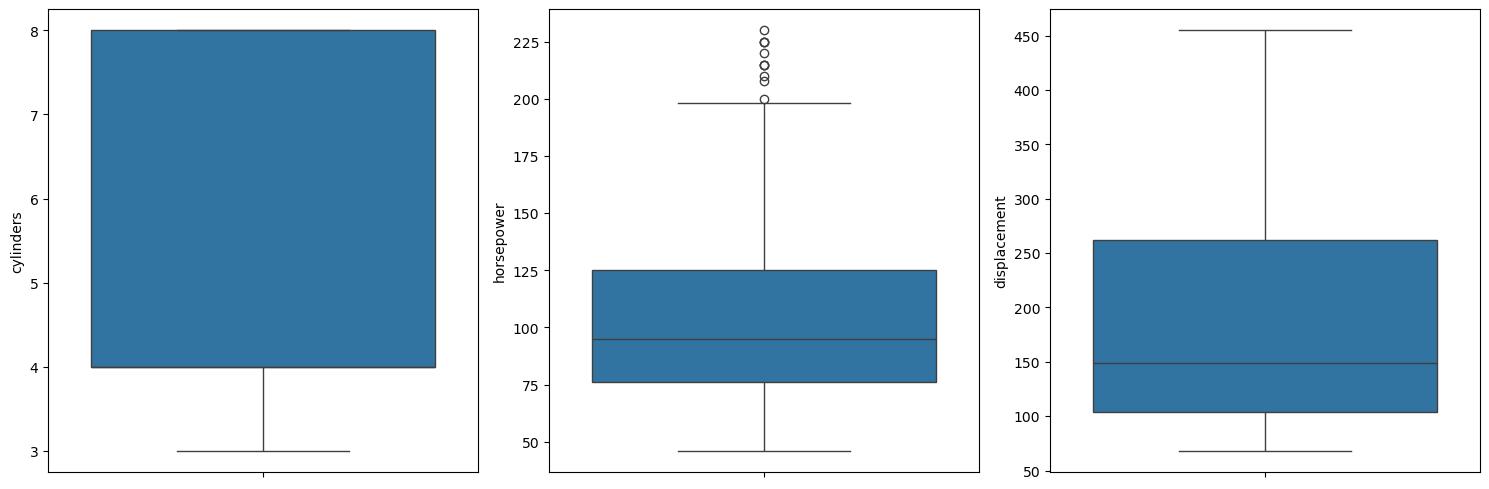

In [15]:
plt.figure(figsize =(15,5))

plt.subplot(1,3,1)
sns.boxplot(data['cylinders'])

plt.subplot(1, 3, 2)
sns.boxplot(data['horsepower'])

plt.subplot(1, 3, 3)
sns.boxplot(data['displacement'])

plt.tight_layout() 
plt.show()

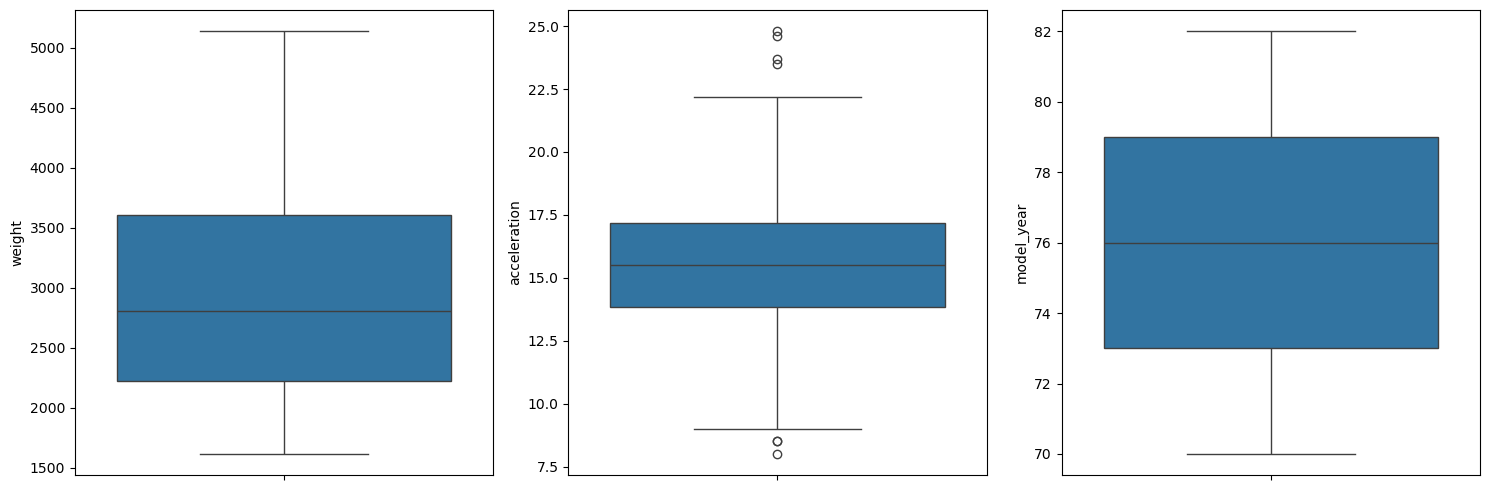

In [16]:
plt.figure(figsize =(15,5))

plt.subplot(1,3,1)
sns.boxplot(data['weight'])

plt.subplot(1, 3, 2)
sns.boxplot(data['acceleration'])

plt.subplot(1, 3, 3)
sns.boxplot(data['model_year'])

plt.tight_layout() 
plt.show()

We can observe that outliers are present in the 'acceleration' and 'horsepower'. We will count how many outliers appear in each of these columns.

In [17]:
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR 
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

In [18]:
print('The samples of outliers of acceleration is ', outliers(data, 'acceleration').shape[0])
print('The samples of outliers of horsepower is ', outliers(data, 'horsepower').shape[0])

The samples of outliers of acceleration is  7
The samples of outliers of horsepower is  11


Such observations can be negatively impact the performance of prediction models. We will create a new dataset that does not contain outliers. Then, we will build regression models and choose the one that performs best in temrs of quality.

In [19]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR 
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

In [20]:
data_remove_outliers = data
data_remove_outliers = remove_outliers(data, 'acceleration')
data_remove_outliers = remove_outliers(data, 'horsepower')

### Preparing the train data and test data

Now, we spliting our datasets. The test sets will consist of 30 % of the entire dataset. 

In [21]:
from sklearn.model_selection import train_test_split

x_data = data.drop('mpg', axis = 1)
y_data = data['mpg']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state = 1)

x_data_ro = data_remove_outliers.drop('mpg', axis = 1)
y_data_ro = data_remove_outliers['mpg']

x_train_ro, x_test_ro, y_train_ro, y_test_ro = train_test_split(x_data_ro, y_data_ro, test_size = 0.3, random_state = 1)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

# Model with outliers
lm1 = LinearRegression()
lm1.fit(x_train[['horsepower','cylinders']], y_train)

R2 = lm1.score(x_test[['horsepower','cylinders']], y_test)
MSE = mse(y_test, lm1.predict(x_test[['horsepower','cylinders']]))
print('R^2 is ', R2)
print('MSE is ', MSE)

# Model without outliers
lm2 = LinearRegression()
lm2.fit(x_train_ro[['horsepower','cylinders']], y_train_ro)

R2 = lm1.score(x_test_ro[['horsepower','cylinders']], y_test_ro)
MSE = mse(y_test_ro, lm1.predict(x_test_ro[['horsepower','cylinders']]))
print('R^2 is ', R2)
print('MSE is ', MSE)

R^2 is  0.6942550309793288
MSE is  17.875973268608387
R^2 is  0.5966811325905761
MSE is  22.226071631991015


We can observe that model deals with outliers and these has positively impact on prediction performance. Based on this analysis, we decided to keep the outliers when building regression models.

### Data normalization

Normalization is the process od transforming values of several variables into a similar range. We use the min - max method for variables are not normally distribution. We apply this step after splitting teh data to prevent information leakage between the training and test sets.

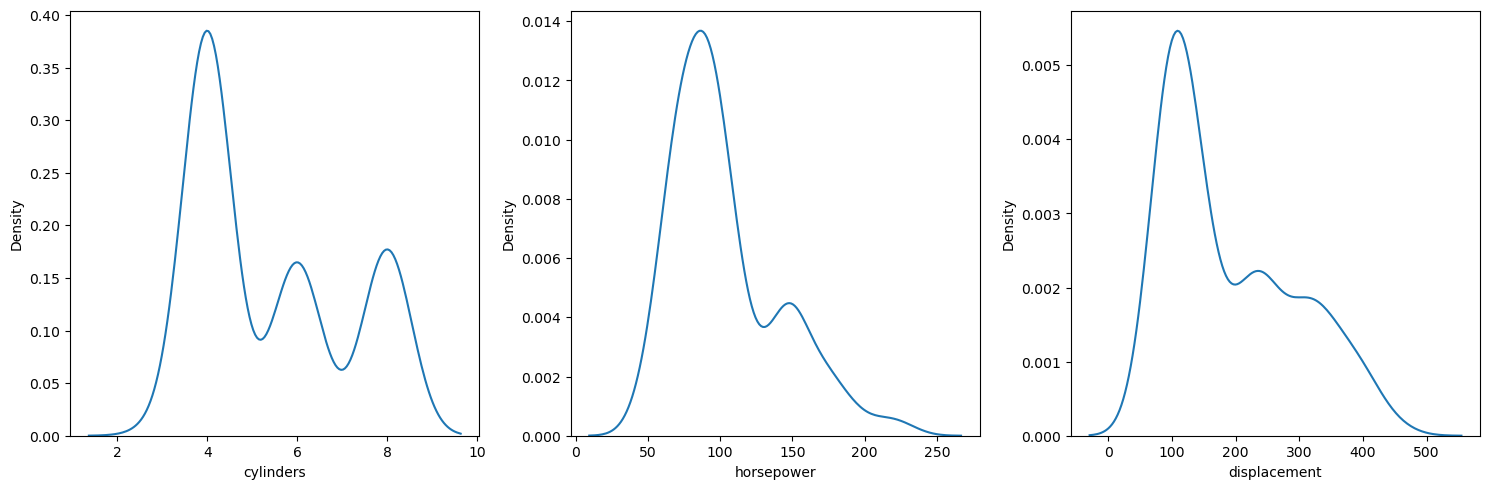

In [24]:
plt.figure(figsize =(15,5))

plt.subplot(1,3,1)
sns.kdeplot(x_train['cylinders'])

plt.subplot(1, 3, 2)
sns.kdeplot(x_train['horsepower'])

plt.subplot(1, 3, 3)
sns.kdeplot(x_train['displacement'])

plt.tight_layout() 
plt.show()

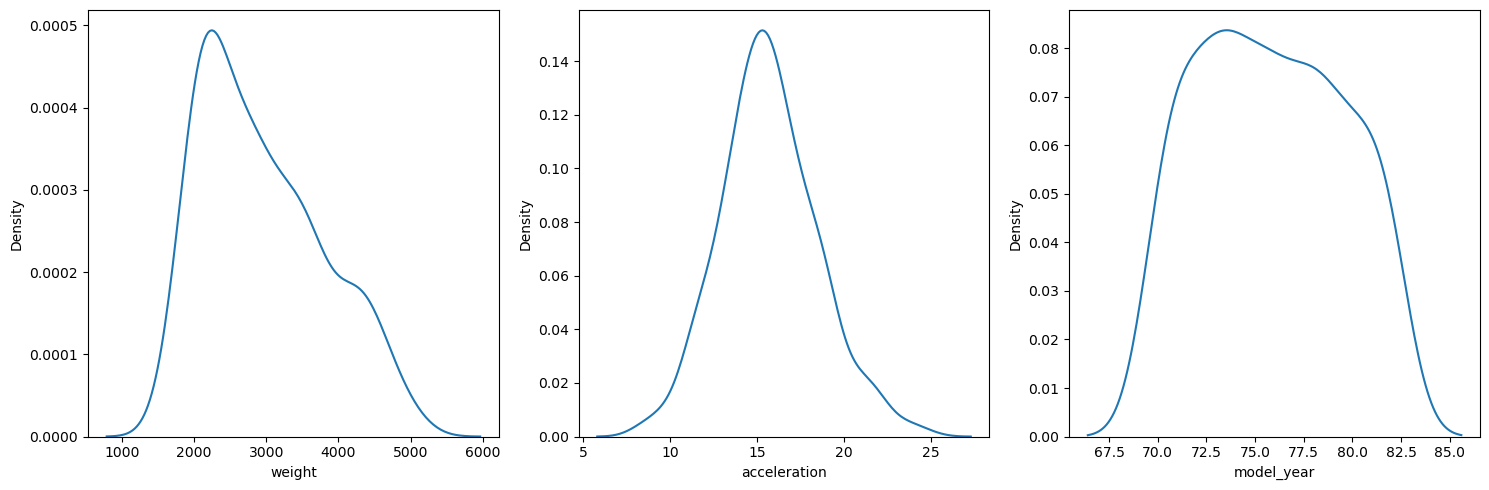

In [25]:
plt.figure(figsize =(15,5))

plt.subplot(1,3,1)
sns.kdeplot(x_train['weight'])

plt.subplot(1, 3, 2)
sns.kdeplot(x_train['acceleration'])

plt.subplot(1, 3, 3)
sns.kdeplot(x_train['model_year'])

plt.tight_layout() 
plt.show()

In [26]:
def normalization(data, column):
    mean = data[column].mean()
    std = data[column].std()

    data[column] = (data[column] - mean)/ std
    return(data)

In [27]:
x_train = normalization(x_train, 'horsepower')
x_train = normalization(x_train, 'cylinders')
x_train = normalization(x_train, 'displacement')
x_train = normalization(x_train, 'weight')
x_train = normalization(x_train, 'acceleration')
x_train= normalization(x_train, 'model_year')

In [28]:
x_test = normalization(x_test, 'horsepower')
x_test = normalization(x_test, 'cylinders')
x_test = normalization(x_test, 'displacement')
x_test = normalization(x_test, 'weight')
x_test = normalization(x_test, 'acceleration')
x_test = normalization(x_test, 'model_year')

After applying normalization

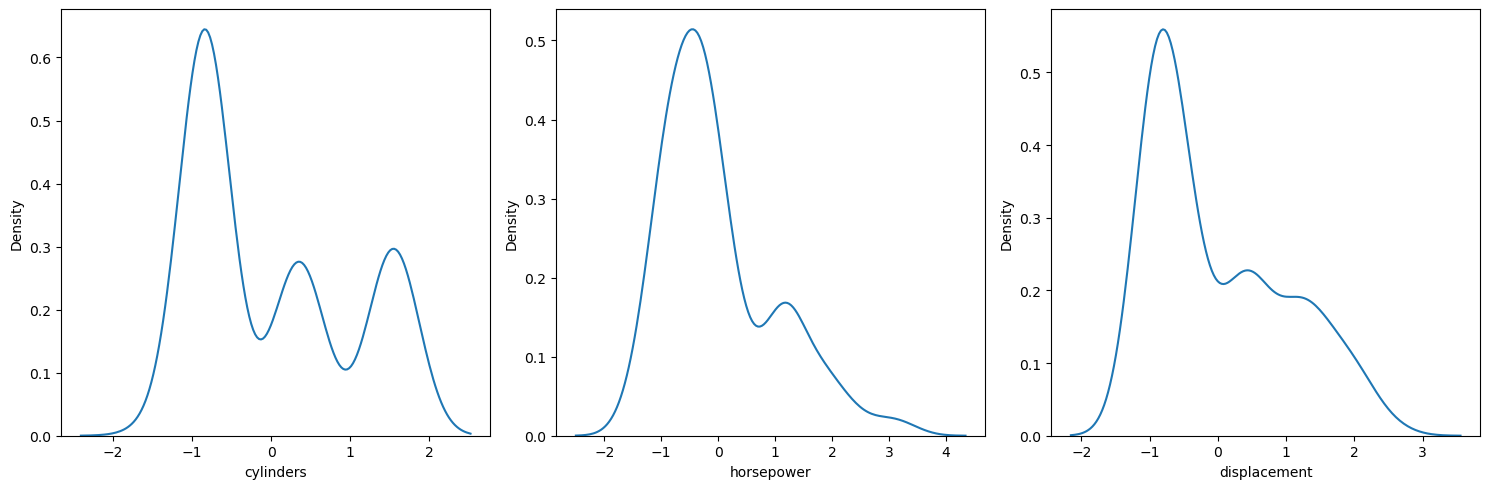

In [29]:
plt.figure(figsize =(15,5))

plt.subplot(1,3,1)
sns.kdeplot(x_train['cylinders'])

plt.subplot(1, 3, 2)
sns.kdeplot(x_train['horsepower'])

plt.subplot(1, 3, 3)
sns.kdeplot(x_train['displacement'])

plt.tight_layout() 
plt.show()

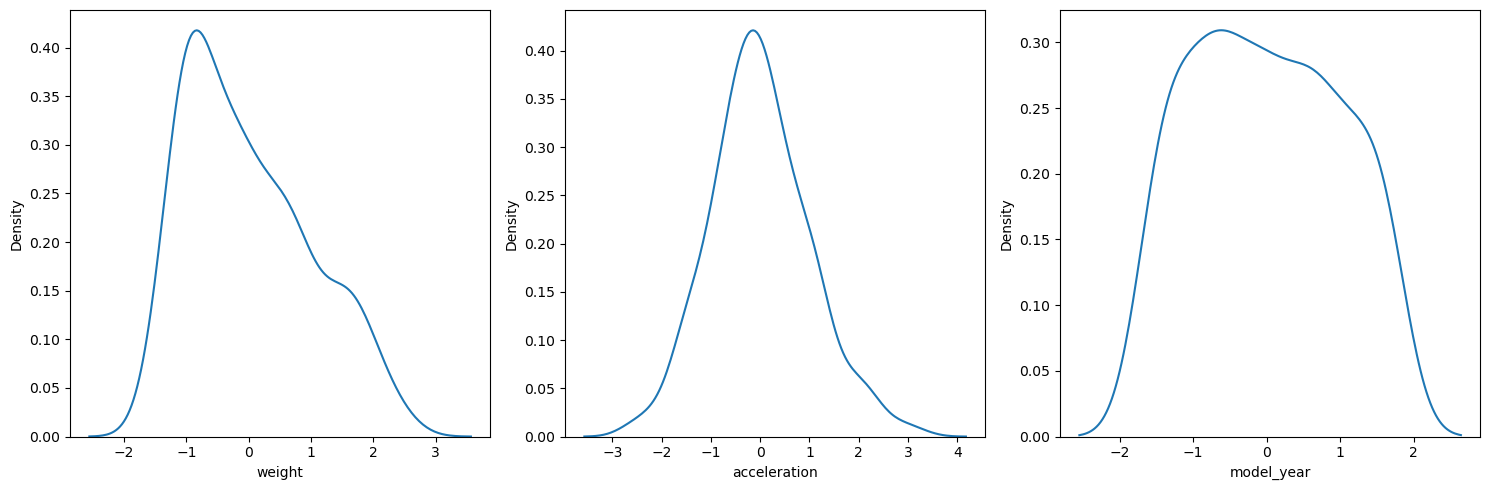

In [30]:
plt.figure(figsize =(15,5))

plt.subplot(1,3,1)
sns.kdeplot(x_train['weight'])

plt.subplot(1, 3, 2)
sns.kdeplot(x_train['acceleration'])

plt.subplot(1, 3, 3)
sns.kdeplot(x_train['model_year'])

plt.tight_layout() 
plt.show()

In [31]:
# Model with normalizated data
lm3 = LinearRegression()
lm3.fit(x_train[['horsepower','cylinders']], y_train)

R3 = lm1.score(x_test[['horsepower','cylinders']], y_test)
MSE = mse(y_test, lm1.predict(x_test[['horsepower','cylinders']]))
print('R^2 is ', R2)
print('MSE is ', MSE)

R^2 is  0.5966811325905761
MSE is  428.33723290627586


After applying normalization, we observed a slight decrease in R2. However, linear regression does not require normalized input.

## Models development

We will prepare a DataFrame to store information about the models. It will include the model number, model type, **Mean Squared Error** (MSE) and $R^2$ - the evaluation metrics for each specific model. The $R^2$ shows what proportion of the variability in the dependent variable is explained by the regression model. If this score is closer to 1, the better is model. The MSE calculate the average of the squared differences between the observed values and the predicted values produced by the model.

In [31]:
result = pd.DataFrame(columns=['Model_number','Model_type','MSE','R-adjusted'])

Now we will build various model using different combinations of variables:
- single linear regression,
- multiple linear regression,
- multivariate polynomial function,
- above models with variables selected by a certain algorithm,
- ridge regression,
- lasso regression.

### Single Linear Regression

Now, we will create a single model, with each columns separately. 

In [32]:
def SLR(x_train, x_test, y_train, y_test, columns):
    model = LinearRegression()
    R2_train_table = []
    MSE_train_table = []
    R2_test_table = []
    MSE_test_table = []
    
    for column in columns:
        model.fit(x_train[[column]], y_train)
        R2_train = model.score(x_train[[column]], y_train)
        MSE_train = mse(y_train, model.predict(x_train[[column]]))
    
        R2_test = model.score(x_test[[column]], y_test)
        MSE_test = mse(y_test, model.predict(x_test[[column]]))

        R2_train_table.append(R2_train)
        MSE_train_table.append(MSE_train)
        R2_test_table.append(R2_test)
        MSE_test_table.append(MSE_test)

    result = pd.DataFrame({'mpg ~': columns, 'R2 train score': R2_train_table, 'MSE train': MSE_train_table, 'R2 test score': R2_test_table, 'MSE test': MSE_test_table})
    return(result)

In [33]:
result_SLR = SLR(x_train, x_test, y_train, y_test, ['displacement', 'horsepower', 'weight', 'cylinders', 'acceleration', 'model_year'])

In [34]:
result_SLR

,mpg ~,R2 train score,MSE train,R2 test score,MSE test
0,displacement,0.626728,23.134405,0.694923,17.836915
1,horsepower,0.585071,25.716195,0.620211,22.205112
2,weight,0.674671,20.163007,0.732706,15.627845
3,cylinders,0.583783,25.796015,0.643598,20.837724
4,acceleration,0.159323,52.102921,0.217917,45.726014
5,model_year,0.331792,41.413745,0.355808,37.663935


The best model of all single models is model with 'weight' as independent variable. But we would create more difficult models, which will be predict better. We select two best results for this regression model based on $R^2$ test score.

In [38]:
SLR_max = result_SLR.nlargest(2, 'R2 test score')

### Multiple linear regression

Now, let us recall the correlation table between 'mpg' and the other variables.

In [38]:
data.corr()['mpg']

mpg              1.000000
cylinders       -0.775396
displacement    -0.804203
horsepower      -0.771437
weight          -0.831741
acceleration     0.420289
model_year       0.579267
origin_usa       0.259022
origin_japan     0.442174
origin_europe   -0.568192
Name: mpg, dtype: float64

In multiple linear regression we should use variables with a higher correlation values, for example: 'cylinders', 'discplacement', 'horsepower', 'weight'.  Now we build multiple linear regression models using different combinations of variables.

In [94]:
def MLR(x_train, x_test, y_train, y_test, columns):
    
    model = LinearRegression()
    
    model.fit(x_train[columns], y_train)
    
    R2_train = model.score(x_train[columns], y_train)
    MSE_train = mse(y_train, model.predict(x_train[columns]))
    
    R2_test = model.score(x_test[columns], y_test)
    MSE_test = mse(y_test, model.predict(x_test[columns]))
    result = pd.DataFrame({'mpg ~': [columns], 'R2 train score': R2_train, 'MSE train': MSE_train, 'R2 test score': R2_test, 'MSE test': MSE_test})

    plt.figure()
    Yhat = model.predict(x_test[columns])
    ax2 = sns.kdeplot(y_test, color = 'r', label = 'Actual Value')
    sns.kdeplot(Yhat, color = 'b', label = 'Predict Value', ax = ax2)
    plt.title(f"Model: mpg ~ {' + '.join(columns)}")
    plt.legend()
    return(result)

C:\Users\sylwe\AppData\Local\Temp\ipykernel_3936\2340933493.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_MLR = pd.concat([result_MLR, result_1, result_2, result_3, result_4, result_5])


,mpg ~,R2 train score,MSE train,R2 test score,MSE test
0,"[displacement, horsepower, weight, cylinders]",0.686853,19.408045,0.748824,14.685501
0,"[displacement, weight]",0.678810,19.906520,0.743128,15.018496
0,"[displacement, horsepower, weight, cylinders, ...",0.813313,11.570390,0.847207,8.933367
0,"[displacement, weight, model_year, origin_europe]",0.809589,11.801190,0.848208,8.874792
0,"[cylinders, displacement, horsepower, weight, ...",0.814081,11.522766,0.844541,9.089194


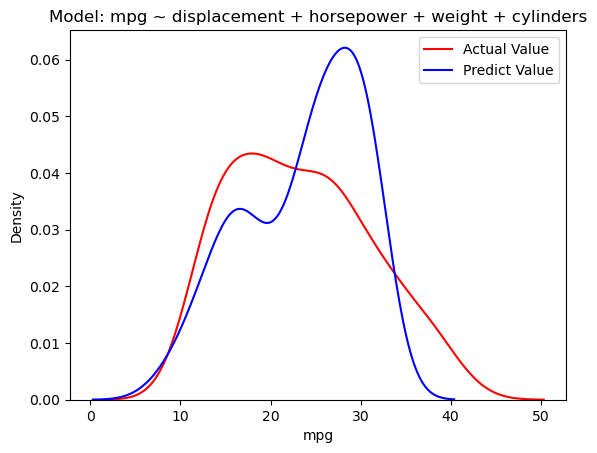

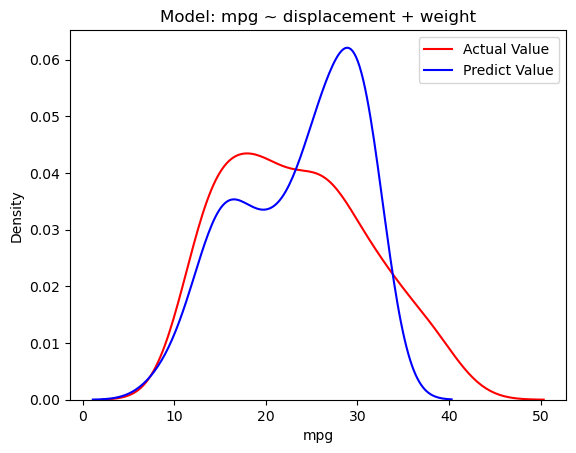

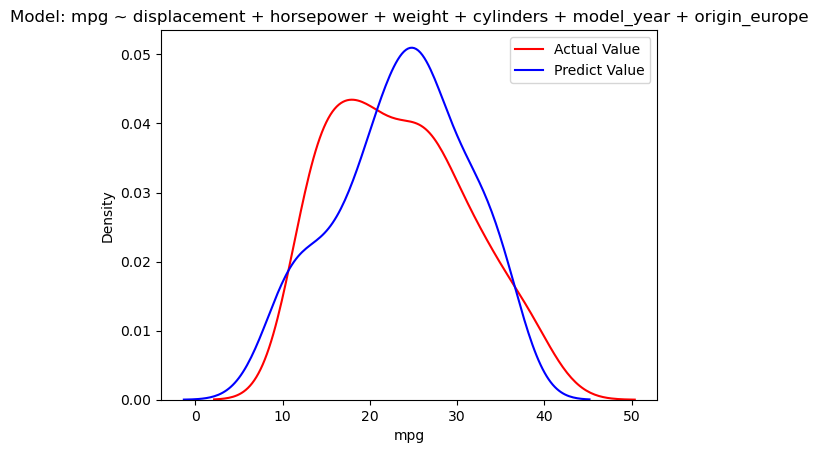

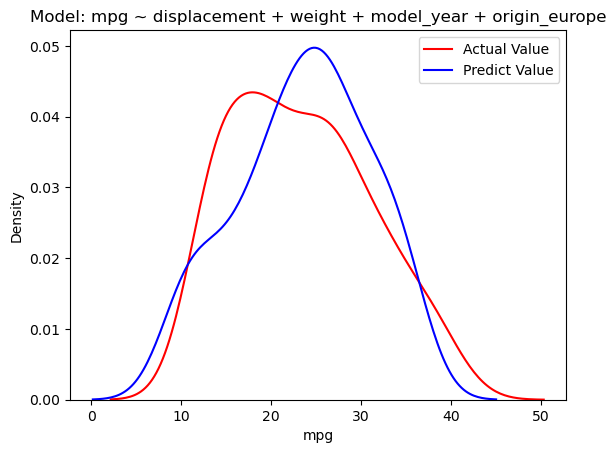

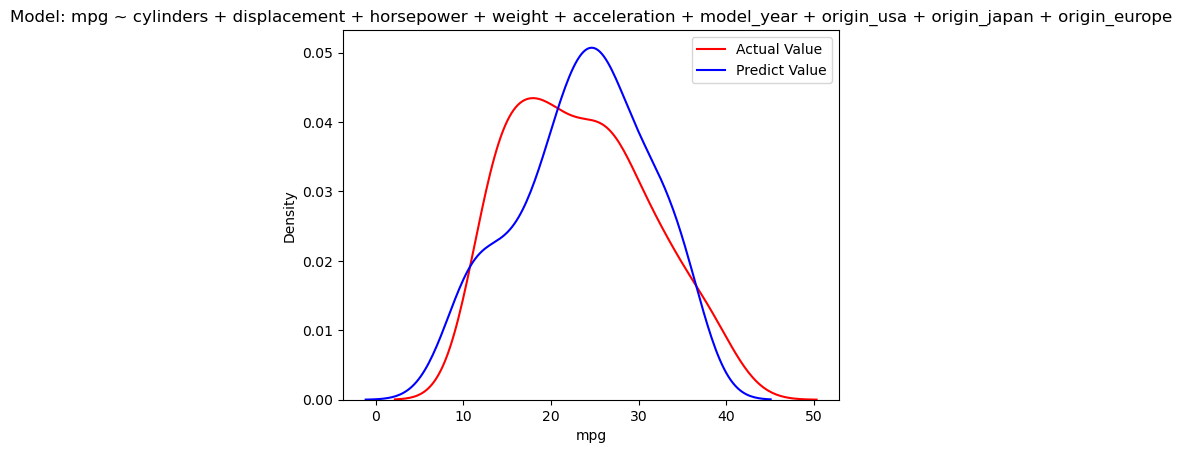

In [95]:
result_MLR = pd.DataFrame(columns = ['mpg ~', 'R2 train score', 'MSE train', 'R2 test score', 'MSE test'])
result_1 = MLR(x_train, x_test, y_train, y_test, ['displacement', 'horsepower', 'weight', 'cylinders'])
result_2 = MLR(x_train, x_test, y_train, y_test, ['displacement', 'weight'])
result_3 = MLR(x_train, x_test, y_train, y_test, ['displacement', 'horsepower', 'weight', 'cylinders', 'model_year', 'origin_europe'])
result_4 = MLR(x_train, x_test, y_train, y_test, ['displacement', 'weight', 'model_year', 'origin_europe'])
result_5 = MLR(x_train, x_test, y_train, y_test, ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_usa', 'origin_japan', 'origin_europe'])
result_MLR = pd.concat([result_MLR, result_1, result_2, result_3, result_4, result_5])
result_MLR

The plots illustrate how accurately the regression models predict mpg. A greater overlap between the predicted and actual value distributions indicates a better fit of the model to the data.

We can observe that sometimes using more variables do not always provide to better estimation.

In [89]:
MLR_max = result_MLR.nlargest(2, 'R2 test score')
MLR_max

,mpg ~,R2 train score,MSE train,R2 test score,MSE test
0,"[displacement, weight, model_year, origin_europe]",0.809589,11.80119,0.848208,8.874792
0,"[displacement, horsepower, weight, cylinders, ...",0.813313,11.57039,0.847207,8.933367


Generally, multiple linear models have better predictive performance than single linear models, but this fact is not surprising to us.

### Multivariate Polynomial function

Now, we will build multivariate polynomial models with degree from 2 to 4 or 5. (Higher-degree models could be used because they tend to give lower $R^2$ test score for this dataset).

In [99]:
from sklearn.preprocessing import PolynomialFeatures

def MPM(x_train, x_test, y_train, y_test, columns, degrees):
    
    R2_train_table = []
    MSE_train_table = []
    R2_test_table = []
    MSE_test_table = []
    
    for i in degrees:
        pr = PolynomialFeatures(degree = i)
        X_train = x_train[columns]
        X_test = x_test[columns]
        X_train_pr = pr.fit_transform(X_train)
        X_test_pr = pr.fit_transform(X_test)

        model = LinearRegression()
        model.fit(X_train_pr, y_train)

        R2_train = model.score(X_train_pr, y_train)
        MSE_train = mse(y_train, model.predict(X_train_pr))
        R2_test = model.score(X_test_pr, y_test)
        MSE_test = mse(y_test, model.predict(X_test_pr))

        R2_train_table.append(round(R2_train,4))
        MSE_train_table.append(round(MSE_train,4))
        R2_test_table.append(round(R2_test,4))
        MSE_test_table.append(round(MSE_test,4))
        
    result = pd.DataFrame({'mpg ~': [columns] * len(degrees), 'degree': degrees, 'R2 train score': R2_train_table, 'MSE train': MSE_train_table, 'R2 test score': R2_test_table, 'MSE test': MSE_test_table})
    return(result)

In [100]:
result_MPM = pd.DataFrame(columns = ['mpg ~', 'degree','R2 train score', 'MSE train', 'R2 test score', 'MSE test'])
result_1 = MPM(x_train, x_test, y_train, y_test, ['displacement', 'weight', 'model_year', 'origin_europe'], [2,3,4,5])
result_2 = MPM(x_train, x_test, y_train, y_test, ['displacement', 'horsepower', 'weight', 'cylinders', 'model_year', 'origin_europe'], [2,3,4])
result_3 = MPM(x_train, x_test, y_train, y_test, ['displacement', 'horsepower'], [2,3,4,5,6,7])

result_MPM = pd.concat([result_1, result_2, result_3])

In [44]:
result_MPM

,mpg ~,degree,R2 train score,MSE train,R2 test score,MSE test
0,"[displacement, weight, model_year, origin_europe]",2,0.8720,7.9328,0.8588,8.2566
1,"[displacement, weight, model_year, origin_europe]",3,0.8911,6.7471,0.8604,8.1634
2,"[displacement, weight, model_year, origin_europe]",4,0.9161,5.2024,0.8229,10.3525
3,"[displacement, weight, model_year, origin_europe]",5,0.9367,3.9246,-0.7203,100.5797
0,"[displacement, horsepower, weight, cylinders, ...",2,0.8936,6.5928,0.8613,8.1115
1,"[displacement, horsepower, weight, cylinders, ...",3,0.9412,3.6413,0.8256,10.1940
2,"[displacement, horsepower, weight, cylinders, ...",4,0.9677,2.0018,-0.7928,104.8224
0,"[displacement, horsepower]",2,0.7267,16.9377,0.7696,13.4707
1,"[displacement, horsepower]",3,0.7358,16.3755,0.7761,13.0931
2,"[displacement, horsepower]",4,0.7520,15.3727,0.7820,12.7434


In [46]:
MPM_max = result_MPM.nlargest(4, 'R2 test score')
MPM_max

,mpg ~,degree,R2 train score,MSE train,R2 test score,MSE test
0,"[displacement, horsepower, weight, cylinders, ...",2,0.8936,6.5928,0.8613,8.1115
1,"[displacement, weight, model_year, origin_europe]",3,0.8911,6.7471,0.8604,8.1634
0,"[displacement, weight, model_year, origin_europe]",2,0.8720,7.9328,0.8588,8.2566
1,"[displacement, horsepower, weight, cylinders, ...",3,0.9412,3.6413,0.8256,10.1940


### Improving Model Construction with column selection by algorithm

Until now, we have been building our models based on intuition, selecting the variables that seemed to have the greatest impact on the response variable. But we can replace intuition with as more systematic approach? Yes, we can use methods which to select a specific number of independent variable for building the model. This method using the mlxtend library.

In [47]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

lr = LinearRegression()

sfs = SFS(lr, k_features='best',forward=True, floating=False, scoring='r2', cv=5)
sfs = sfs.fit(x_data, y_data)

print(sfs.k_feature_names_)


('cylinders', 'displacement', 'weight', 'model_year', 'origin_europe')


We can see that our intuition is quite good - it performs very similarly to the algorithm.

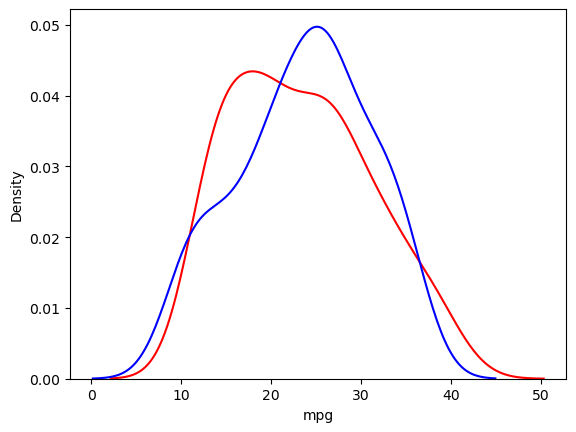

In [90]:
MLR_max_sfs = MLR(x_train, x_test, y_train, y_test, ['cylinders', 'displacement', 'weight', 'model_year', 'origin_europe'])

In [91]:
MLR_max_sfs

,mpg ~,R2 train score,MSE train,R2 test score,MSE test
0,"[cylinders, displacement, weight, model_year, ...",0.810196,11.763534,0.848663,8.848215


In [57]:
result = MPM(x_train, x_test, y_train, y_test, ['cylinders', 'displacement', 'weight', 'model_year', 'origin_europe'], [2,3,4])
result

,mpg ~,degree,R2 train score,MSE train,R2 test score,MSE test
0,"[cylinders, displacement, weight, model_year, ...",2,0.8758,7.6952,0.8577,8.3202
1,"[cylinders, displacement, weight, model_year, ...",3,0.9156,5.2293,0.6152,22.4973
2,"[cylinders, displacement, weight, model_year, ...",4,0.9380,3.8417,-3.9905,291.7808


In [58]:
MPM_max_sfs = result.nlargest(1, 'R2 test score')

In [59]:
MPM_max_sfs

,mpg ~,degree,R2 train score,MSE train,R2 test score,MSE test
0,"[cylinders, displacement, weight, model_year, ...",2,0.8758,7.6952,0.8577,8.3202


### Rigde Regression

Ridge regression is an extension of linear regression that deals with high correlation between explanatory variables. When such correlation is strong, the model adds a penatly term. A a result, the model becomes more robust to noisy data and more stable.

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import  Ridge

X_train = x_train[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin_usa', 'origin_japan', 'origin_europe']]
X_test = x_test[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin_usa', 'origin_japan', 'origin_europe']]

parameters = {'alpha': [0.001,0.01,0.1,1,10,100,1000]}
Ridge = Ridge()
Grid = GridSearchCV(estimator = Ridge, param_grid = parameters,cv = 5)
Grid = Grid.fit(X_train, y_train)
BestRidge = Grid.best_estimator_

In [61]:
R2_test = BestRidge.score(X_test, y_test)
R2_train = BestRidge.score(X_train, y_train)
MSE_train = mse(y_train, BestRidge.predict(X_train))
MSE_test = mse(y_test, BestRidge.predict(X_test))
result_RR = pd.DataFrame([{'R2 train score': R2_train, 'MSE train': MSE_train, 'R2 test score': R2_test, 'MSE test': MSE_test}])
result_RR 

,R2 train score,MSE train,R2 test score,MSE test
0,0.813879,11.535297,0.845714,9.020644


In [64]:
max_RR = result_RR 

### Lasso Regression

Lasso Regression, similar to Ridge Regression, add a penatly term when correlation between two variables is high. Moreover, this model select a important features to build it. As a result, the model will be simpler and more interpretable.

In [62]:
from sklearn.linear_model import  Lasso

X_train = x_train[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin_usa', 'origin_japan', 'origin_europe']]
X_test = x_test[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin_usa', 'origin_japan', 'origin_europe']]

parameters = {'alpha': [0.001,0.01,0.1,1,10,100,1000]}
Lasso = Lasso()
Grid = GridSearchCV(estimator = Lasso, param_grid = parameters,cv = 5)
Grid = Grid.fit(X_train, y_train)
BestRidge = Grid.best_estimator_

In [63]:
R2_test = BestRidge.score(X_test, y_test)
R2_train = BestRidge.score(X_train, y_train)
MSE_train = mse(y_train, BestRidge.predict(X_train))
MSE_test = mse(y_test, BestRidge.predict(X_test))
result_LR = pd.DataFrame([{'R2 train score': R2_train, 'MSE train': MSE_train, 'R2 test score': R2_test, 'MSE test': MSE_test}])
result_LR 

,R2 train score,MSE train,R2 test score,MSE test
0,0.805884,12.030811,0.846125,8.996627


In [65]:
max_LR = result_LR

## Conclusion

Now, we see our results.

In [67]:
# single linear model
SLR_max

,mpg ~,R2 train score,MSE train,R2 test score,MSE test
2,weight,0.674671,20.163007,0.732706,15.627845
0,displacement,0.626728,23.134405,0.694923,17.836915


In [68]:
# multiple linear model
MLR_max

,mpg ~,R2 train score,MSE train,R2 test score,MSE test
0,"[displacement, weight, model_year, origin_europe]",0.809589,11.80119,0.848208,8.874792
0,"[displacement, horsepower, weight, cylinders, ...",0.813313,11.57039,0.847207,8.933367


In [69]:
# multivariate polynomial function
MPM_max

,mpg ~,degree,R2 train score,MSE train,R2 test score,MSE test
0,"[displacement, horsepower, weight, cylinders, ...",2,0.8936,6.5928,0.8613,8.1115
1,"[displacement, weight, model_year, origin_europe]",3,0.8911,6.7471,0.8604,8.1634
0,"[displacement, weight, model_year, origin_europe]",2,0.8720,7.9328,0.8588,8.2566
1,"[displacement, horsepower, weight, cylinders, ...",3,0.9412,3.6413,0.8256,10.1940


In [70]:
# multiple linear model with selected columns
MLR_max_sfs

,mpg ~,R2 train score,MSE train,R2 test score,MSE test
0,"[cylinders, displacement, weight, model_year, ...",0.810196,11.763534,0.848663,8.848215


In [71]:
# multivariate polynomial function with selected columns
MPM_max_sfs

,mpg ~,degree,R2 train score,MSE train,R2 test score,MSE test
0,"[cylinders, displacement, weight, model_year, ...",2,0.8758,7.6952,0.8577,8.3202


In [72]:
# ridge regression
max_RR 

,R2 train score,MSE train,R2 test score,MSE test
0,0.813879,11.535297,0.845714,9.020644


In [73]:
# lasso regression
max_LR

,R2 train score,MSE train,R2 test score,MSE test
0,0.805884,12.030811,0.846125,8.996627


We can see that model with multivariate polynomial function 'mpg' ~ 'displacement' + 'horsepower' + 'weight' + 'cylinders' + 'model_year' + 'origin_europe' with degree = 2 give the best $R^2$ test score. This model should not be overfitting. Similarly, model: 'mpg' ~ 'displacement' + 'weight' +  'model_year' + 'origin_europe' with degree = 3 give very good R^2$ test score. Also these 'MSE' test results are very low.

In summary, we would use the two models mentioned above for predicting 'mpg'.
At the end, we plot the scatter plot for these models.

Text(0.5, 1.0, 'Predicted vs Actual (Best Polynomial Model)')

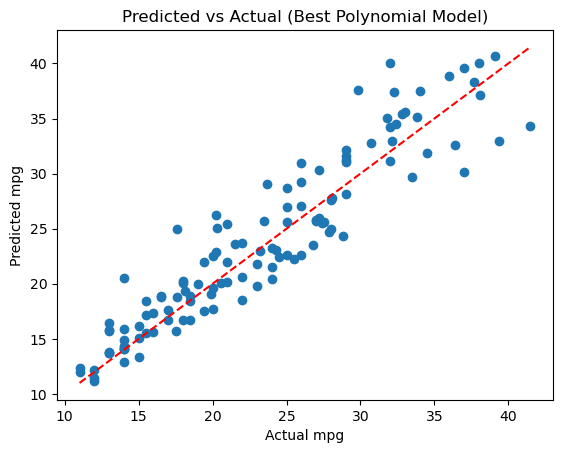

In [102]:
pr = PolynomialFeatures(degree = 2)
X_train = x_train[[ 'displacement','horsepower', 'weight', 'cylinders', 'model_year', 'origin_europe']]
X_test = x_test[['displacement','horsepower', 'weight', 'cylinders', 'model_year', 'origin_europe']]
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_pr, y_train)

plt.scatter(y_test, model.predict(X_test_pr))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual mpg")
plt.ylabel("Predicted mpg")
plt.title("Predicted vs Actual (Best Polynomial Model)")

Text(0.5, 1.0, 'Predicted vs Actual (Best Polynomial Model)')

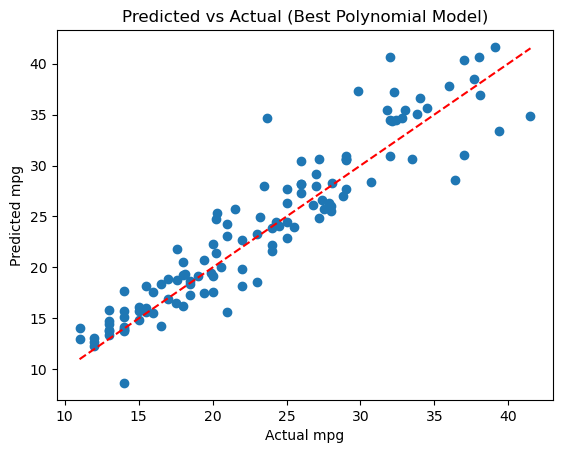

In [103]:
pr = PolynomialFeatures(degree = 3)
X_train = x_train[['displacement', 'weight', 'model_year', 'origin_europe']]
X_test = x_test[['displacement', 'weight', 'model_year', 'origin_europe']]
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_pr, y_train)

plt.scatter(y_test, model.predict(X_test_pr))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual mpg")
plt.ylabel("Predicted mpg")
plt.title("Predicted vs Actual (Best Polynomial Model)")

Text(0.5, 1.0, 'Predicted vs Actual (Best Polynomial Model)')

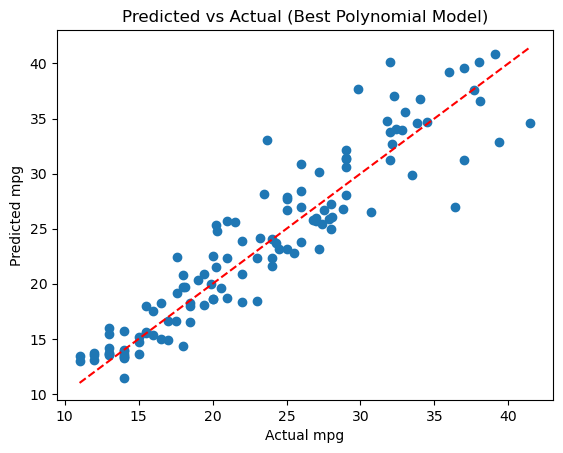

In [104]:
pr = PolynomialFeatures(degree = 2)
X_train = x_train[['displacement', 'weight', 'model_year', 'origin_europe']]
X_test = x_test[['displacement', 'weight', 'model_year', 'origin_europe']]
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_pr, y_train)

plt.scatter(y_test, model.predict(X_test_pr))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual mpg")
plt.ylabel("Predicted mpg")
plt.title("Predicted vs Actual (Best Polynomial Model)")